In [35]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [36]:
data = pd.read_csv("./Income1.csv")
data.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


Text(0, 0.5, 'Income')

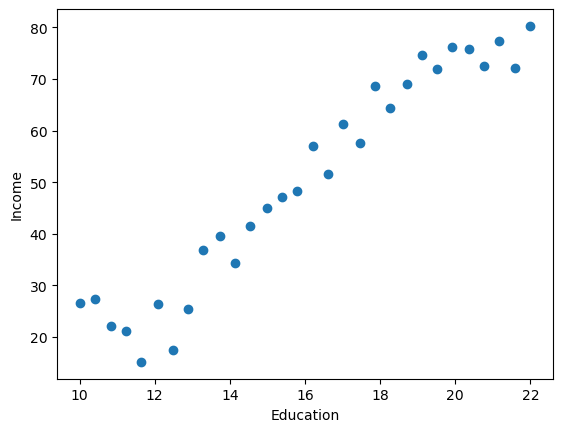

In [37]:
plt.scatter(data.Education,data.Income)
plt.xlabel("Education")
plt.ylabel("Income")

In [38]:
X = torch.from_numpy(data.Education.values.reshape(-1,1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1,1)).type(torch.FloatTensor)

In [39]:
class EIModel(nn.Module):
    def __init__(self):
        super(EIModel,self).__init__()
        self.Linear = nn.Linear(in_features=1,out_features=1)
    def forward(self,inputs):
        logits = self.Linear(inputs)
        return logits

In [40]:
model = EIModel()

In [41]:
loss_fn = nn.MSELoss()

In [42]:
opt = torch.optim.SGD(model.parameters(),lr=0.0001)

In [43]:
for epoch  in range(5000):
    for x,y in zip(X,Y):
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        #梯度清零
        opt.zero_grad()
        #反向传播
        loss.backward()
        #优化参数
        opt.step()

In [45]:
list(model.parameters())
list(model.named_parameters())

[('Linear.weight',
  Parameter containing:
  tensor([[4.9720]], requires_grad=True)),
 ('Linear.bias',
  Parameter containing:
  tensor([-28.3225], requires_grad=True))]

In [46]:
model.Linear.weight

Parameter containing:
tensor([[4.9720]], requires_grad=True)

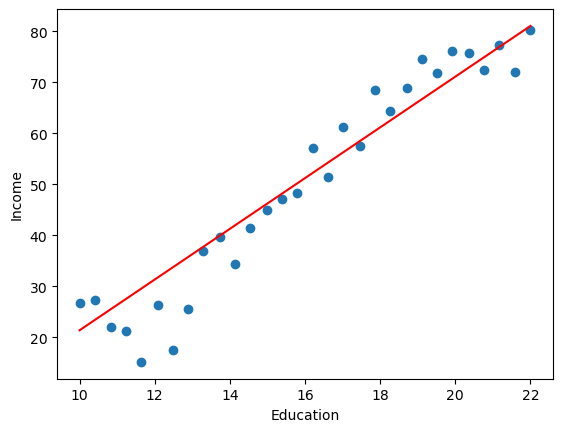

In [48]:
plt.scatter(data.Education,data.Income)
plt.xlabel("Education")
plt.ylabel("Income")
plt.plot(data.Education , model(X).detach().numpy(),color = "r")